In [18]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import random
import time

In [19]:
mat = scipy.io.loadmat('mnist-original.mat') # lecture du fichier
data = np.transpose(mat['data'])
label = np.transpose(mat['label'])
X = [data[i].reshape(28,28) for i in range(len(data)) ]

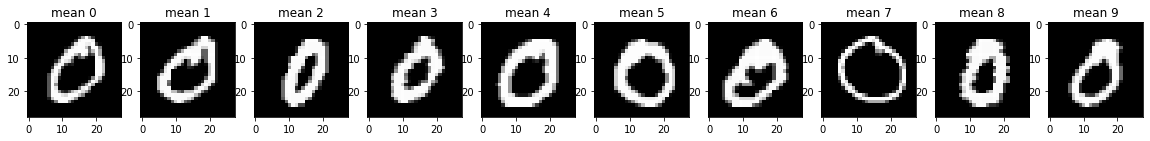

In [3]:
fig, ax = plt.subplots(1,10,figsize=(20,2)) # affichage des centroïdes 
for i in range(10):
    ax[i].imshow(X[i],cmap='gray')
    ax[i].set_title("mean "+str(i))

In [50]:
def index_chiffre(n, y):
    return [i for i in range(len(y)) if y[i]==n] 

def coherence(p,partition,centroide_p):
    res = 0
    index = index_chiffre(p,partition)
    for i in index:
        res += np.linalg.norm(data[i]-centroide_p,2)**2
    return res
    
def centroide(p,partition):
    res = np.zeros(np.shape(data[0]))
    index = index_chiffre(p,partition)
    for i in index:
        res += data[i]
    return res/len(index)   

In [77]:
def cluster(données,indices,k,tol):
    
    indices2 = [int(i) for i in indices] #initialisation
    partition = [random.randint(0,k-1) for w in données]
    means = [centroide(p,partition) for p in range(k)]
    quality = [sum([coherence(p,partition,means[p]) for p in range(k)])]
    
    fig, ax = plt.subplots(1,10,figsize=(20,2)) # affichage des centroïdes 
    for i in range(10):
        ax[i].imshow(M[i].reshape(28,28),cmap='gray')
        ax[i].set_title("mean "+str(i))
    
    for i in indices2:          #première itération
        l = [np.linalg.norm(données[i]-means[p],2) for p in range(k)]
        partition[i] = l.index(min(l))
    means = [centroide(p,partition) for p in range(k)]
    quality.append(sum([coherence(p,partition,means[p]) for p in range(k)]))
    
    fig, ax = plt.subplots(1,10,figsize=(20,2)) # affichage des centroïdes 
    for i in range(10):
        ax[i].imshow(M[i].reshape(28,28),cmap='gray')
        ax[i].set_title("mean "+str(i))
    
    while np.abs(quality[-1]-quality[-2])>tol:  #itérations successives avec condition d'arrêt de |Q(t)-Q(t-1)|<tol
        for j in indices2:
            l = [np.linalg.norm(données[j]-means[p],2) for p in range(k)]
            partition[j] = l.index(min(l))
        means = [centroide(p,partition) for p in range(k)]
        quality.append(sum([coherence(p,partition,means[p]) for p in range(k)]))
        
        fig, ax = plt.subplots(1,10,figsize=(20,2)) # affichage des centroïdes 
        for i in range(10):
            ax[i].imshow(M[i].reshape(28,28),cmap='gray')
            ax[i].set_title("mean "+str(i))
    
    A =[i for i,j in zip(label,P) if i==j] #pourcentage total
    pourcentage_total = len(A)*100/len(data)
    print("pourcentage_total = " + str(pourcentage_total))
    
    return partition,means,quality,len(quality)

pourcentage_total = 10.028571428571428
Temps de réalisation : 58.078693866729736 secondes


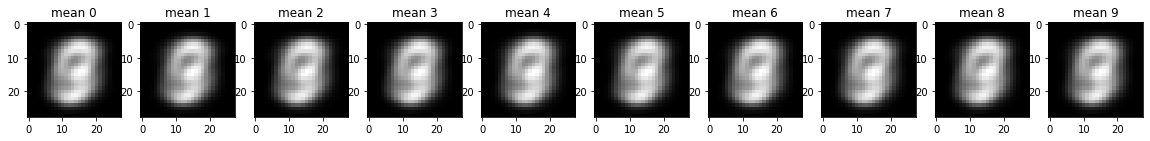

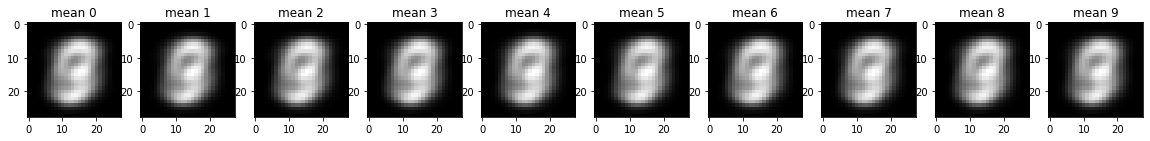

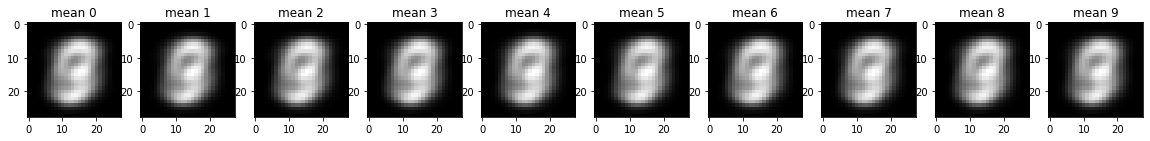

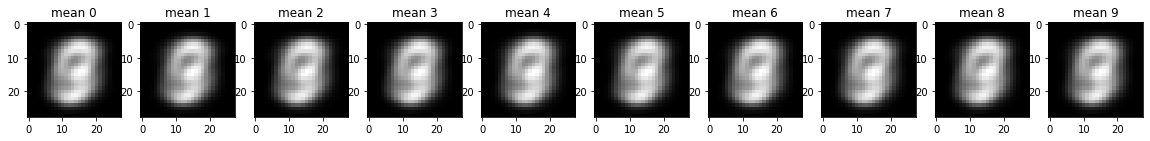

In [76]:
start=time.time()
P,M,Q,n = cluster(data,label,10,10**(-32))
end=time.time()
print("Temps de réalisation : " + str(end-start) + " secondes")